## Experiment 1: Threshold of SNr delay

I will test the range of Str activation that enables delayed firing of SNr. First, I will find the minimal number of Str cells need to pass delay, and then test the delay property from minimum to maximum number of Str cells to ensure that latency distribution remains unchanged. 

When 0% of Str cells are activated,

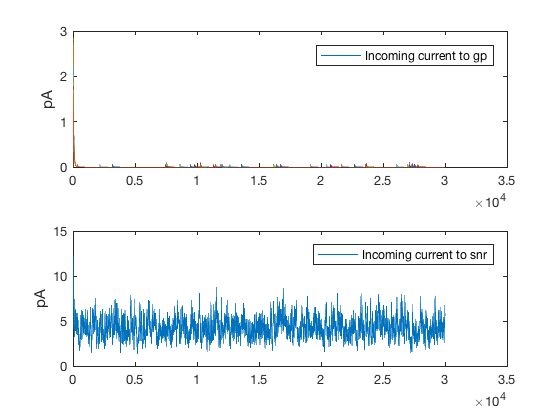

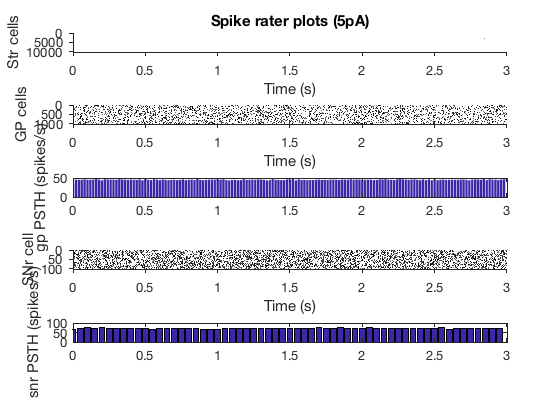

In [2]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr,Isyn_snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest
for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',60,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 200; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 500; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')

figure
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr(1,:))
ylabel('pA')
legend('Incoming current to snr')


There is no transimission of signals to GPe and SNr. 

When 20% of cells are activated, cascade inhibition of SNr occurs.

In [ ]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr,Isyn_snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

g_gp2snr
Isyn_snr

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',20,'I_exc_gp',60,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'Isyn_snr_i',Isyn_snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 200; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 200; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')

figure
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')


Next, I was curious if increasing firing of GPe changes the threshold property. Changing f.r. of GPe from ~50Hz to ~20Hz blocked cascade disinhibition of SNr. 


g_gp2snr =

    0.2563


Isyn_snr =

    4.6862

Elapsed time is 0.951245 seconds.
Elapsed time is 0.917526 seconds.
Elapsed time is 0.859924 seconds.
Elapsed time is 0.844942 seconds.
Elapsed time is 0.884921 seconds.
Elapsed time is 0.837692 seconds.
Elapsed time is 0.809328 seconds.
Elapsed time is 0.859330 seconds.
Elapsed time is 0.881622 seconds.
Elapsed time is 0.850022 seconds.


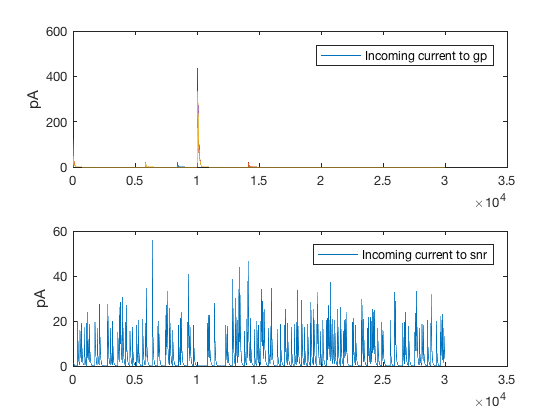

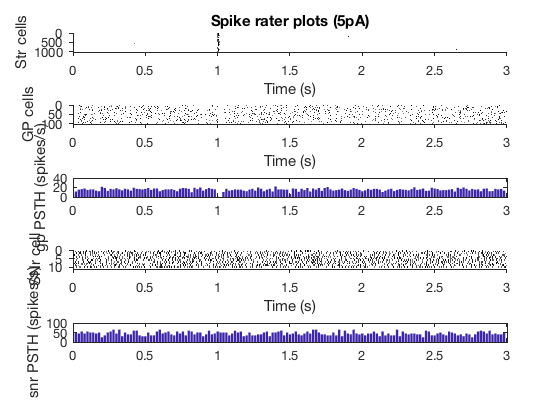

In [39]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr,Isyn_snr] = BGdelayline_setinit2('I_exc_gp',40,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

g_gp2snr
Isyn_snr

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',20,'I_exc_gp',40,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'Isyn_snr_i',Isyn_snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 200; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 200; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')

figure
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')


At low firing of GPe, increasing percentage of cells activated in the striatum has relatively small effect in disinhibiting SNr.


g_gp2snr =

    0.2457


Isyn_snr =

    4.3863

Elapsed time is 0.859962 seconds.
Elapsed time is 0.873062 seconds.
Elapsed time is 0.892125 seconds.
Elapsed time is 0.862103 seconds.
Elapsed time is 0.849202 seconds.
Elapsed time is 0.873936 seconds.
Elapsed time is 0.844936 seconds.
Elapsed time is 0.848379 seconds.
Elapsed time is 0.800097 seconds.
Elapsed time is 0.804027 seconds.


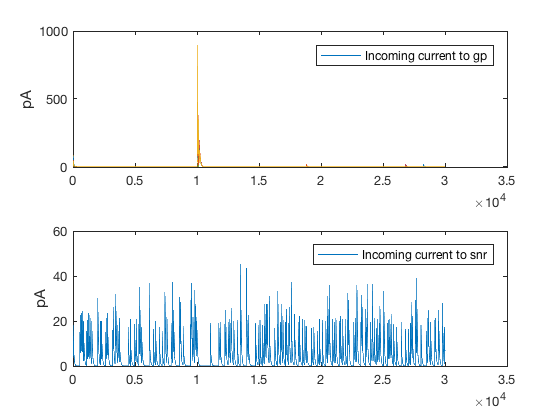

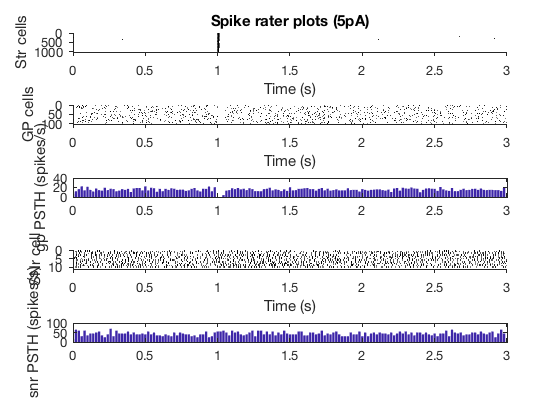

In [43]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr,Isyn_snr] = BGdelayline_setinit2('I_exc_gp',40,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

g_gp2snr
Isyn_snr

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',100,'I_exc_gp',40,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'Isyn_snr_i',Isyn_snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 200; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 200; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')

figure
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')


The threshold of disinhibition of SNr is dependent on GPe basal firing rate. 


## Does the amount of Str activation change the latency of SNr firing?

I will compare the onset of increase in SNr firing while changing the percentage of Str cell activation from 10 to 100, in increments of 10.


tdelay =

  Columns 1 through 7

       NaN       NaN       NaN       NaN    1.1250    1.0650    1.1450
       NaN       NaN    1.0550    1.1450       NaN       NaN    1.1450
       NaN       NaN       NaN    1.1650       NaN       NaN       NaN
       NaN    1.0250       NaN    1.1550       NaN    1.1450    1.0750
       NaN       NaN       NaN    1.0550       NaN    1.0850    1.1350
       NaN    1.1750    1.0450       NaN       NaN       NaN       NaN
       NaN    1.1050    1.0550       NaN    1.1250       NaN    1.0250
       NaN    1.0750    1.1850       NaN       NaN    1.1150    1.1050
    1.0150    1.0550       NaN       NaN    1.0250    1.0550       NaN
       NaN       NaN    1.0850       NaN       NaN    1.0450       NaN

  Columns 8 through 11

    1.0850    1.1950    1.0750       NaN
    1.1150       NaN       NaN       NaN
       NaN       NaN       NaN       NaN
    1.1450       NaN       NaN    1.1350
       NaN    1.0150    1.0150    1.0650
    1.0750    1.0450    1.

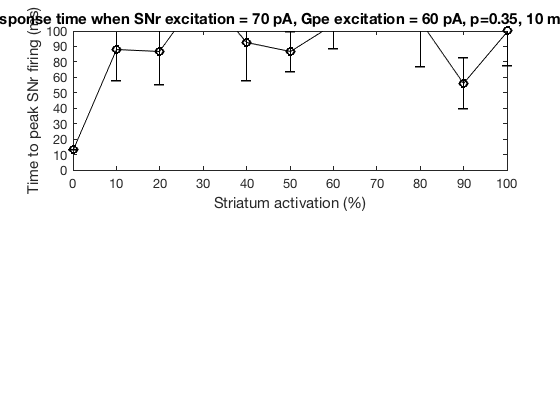

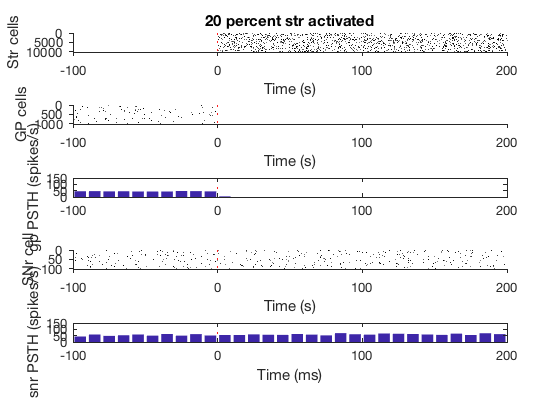

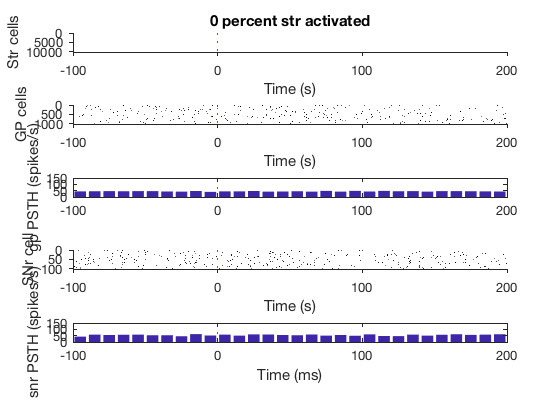

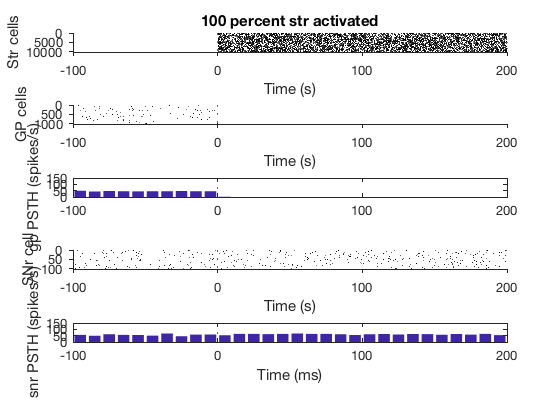

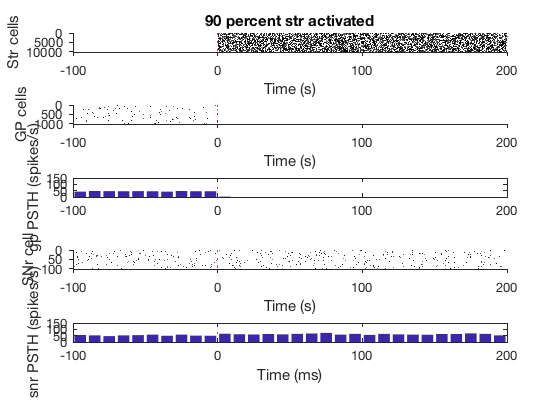

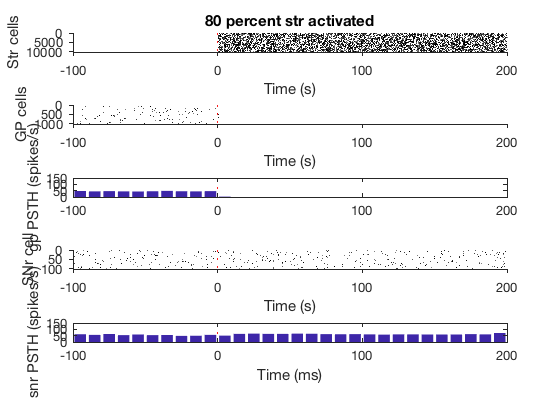

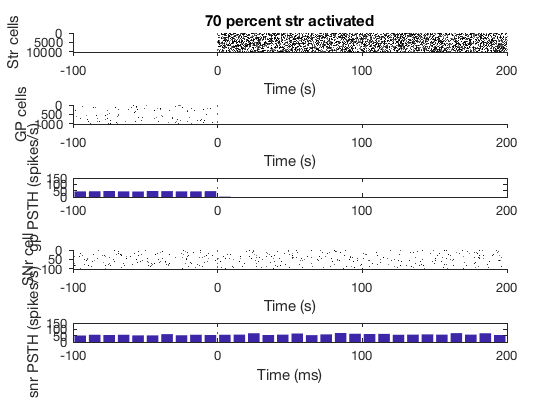

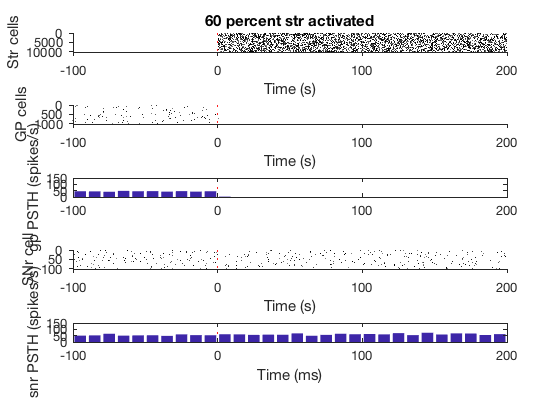

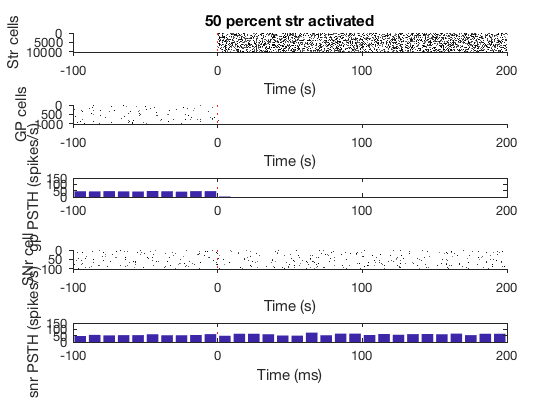

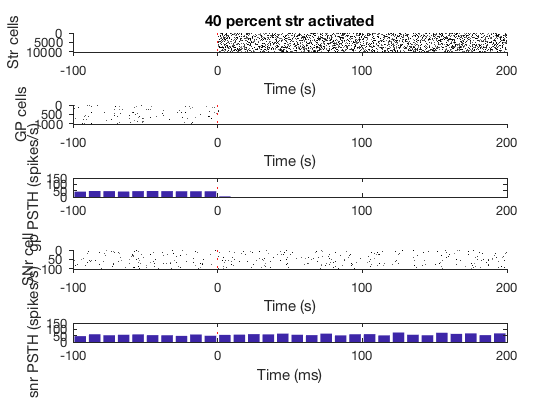

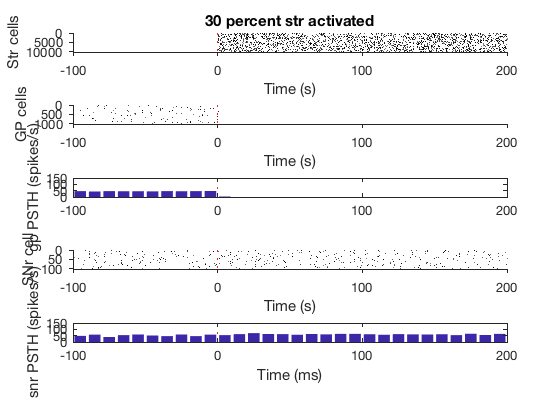

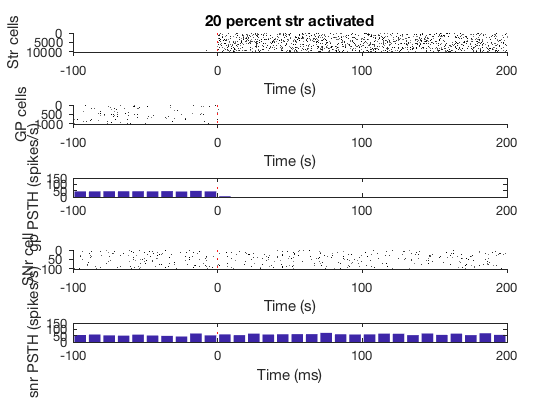

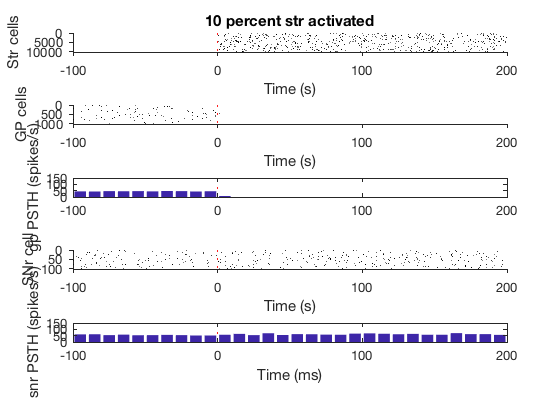

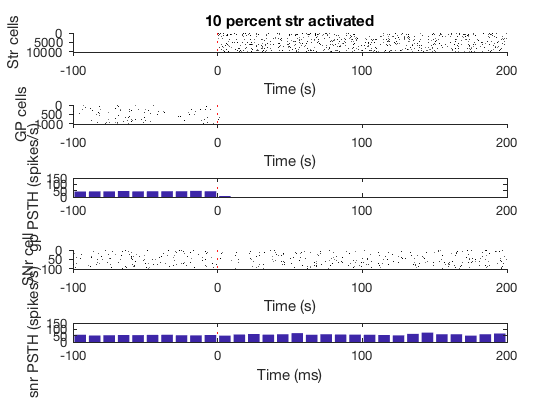

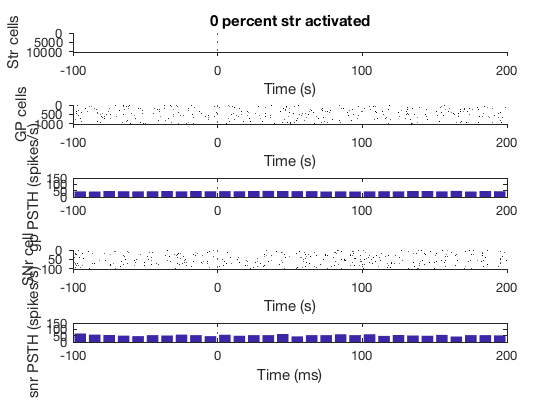

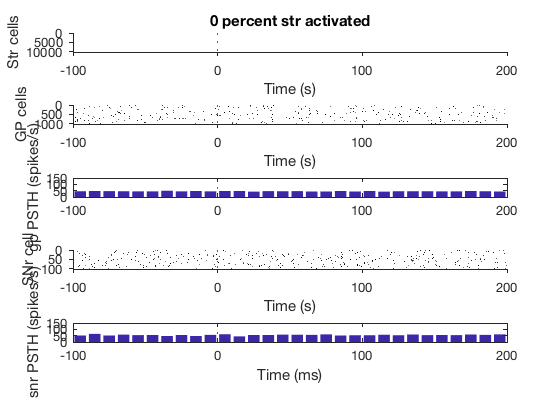

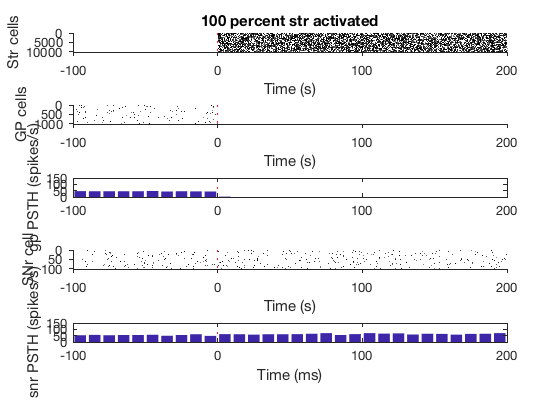

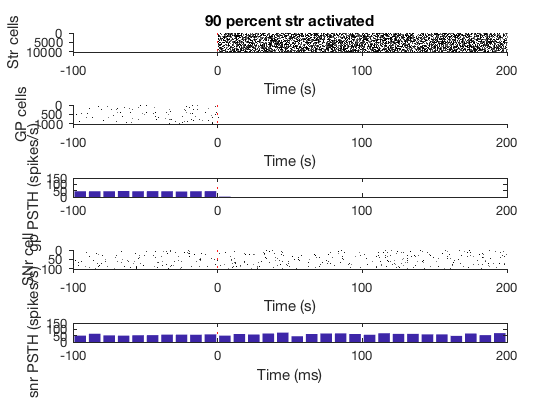

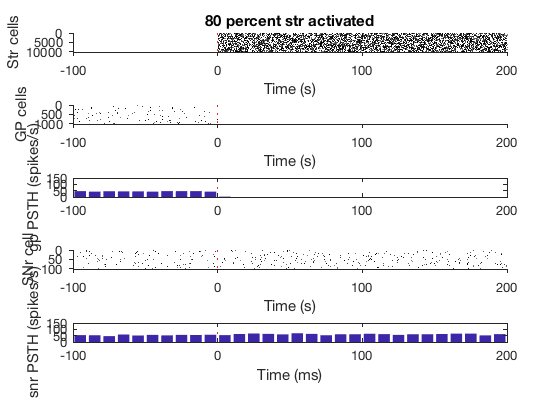

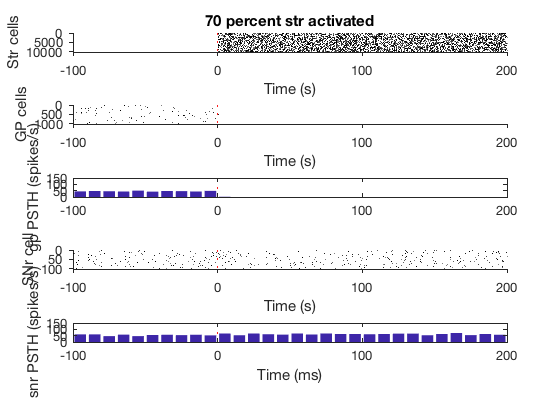

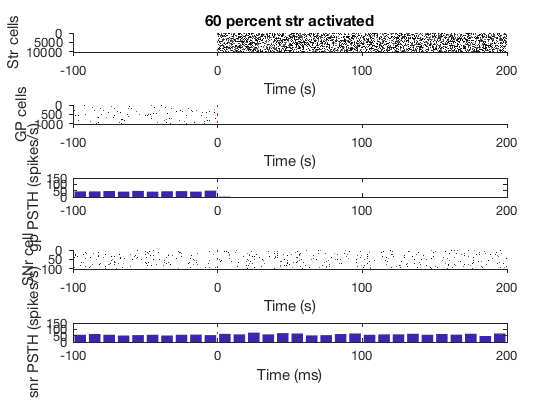

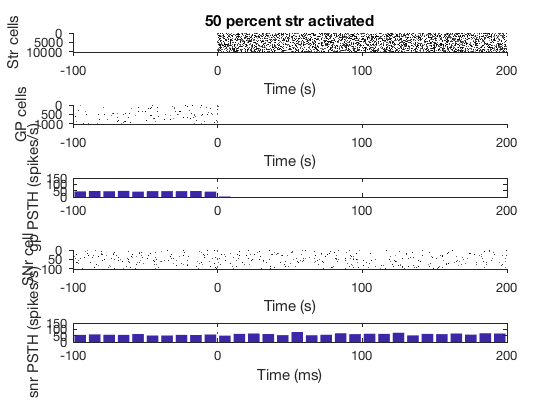

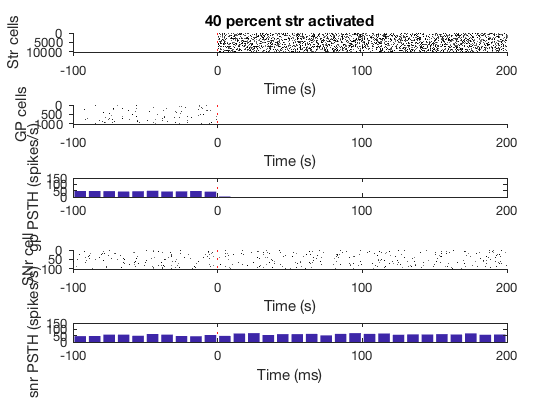

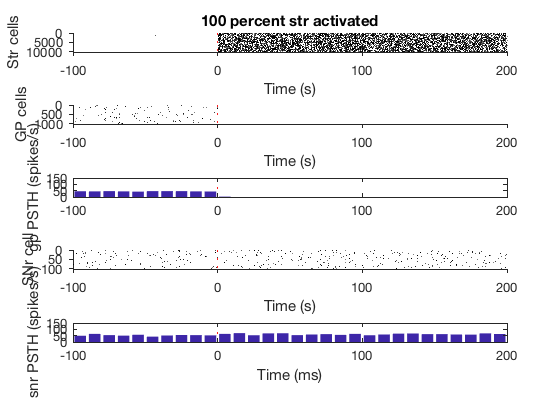

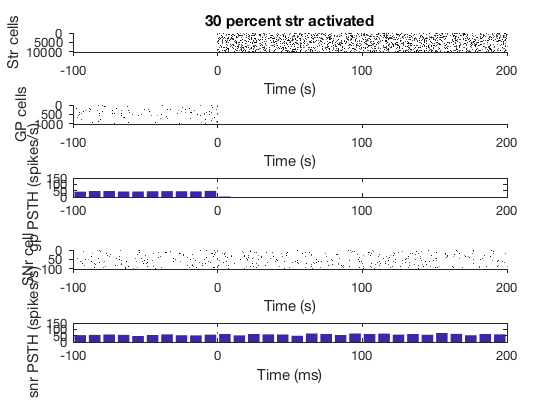

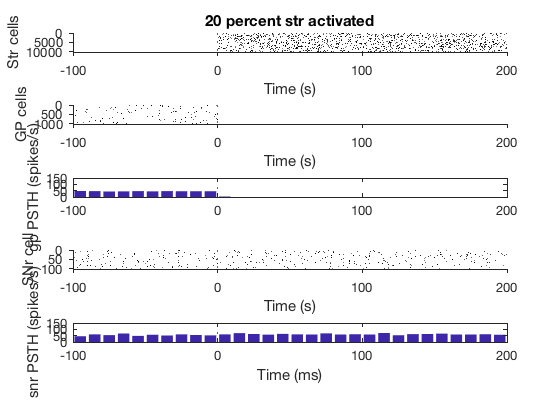

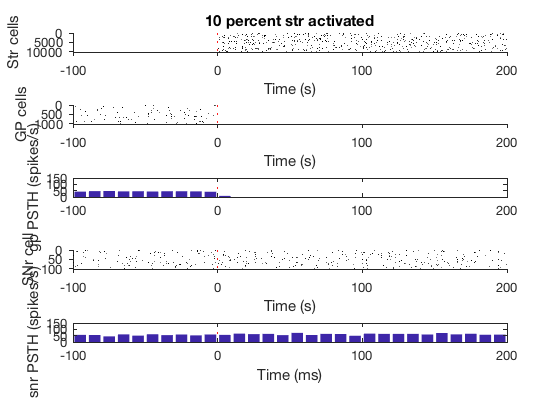

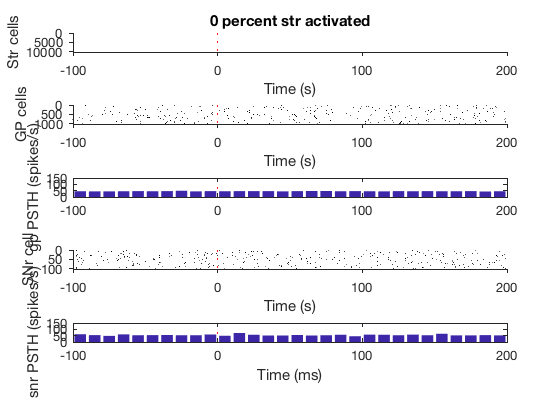

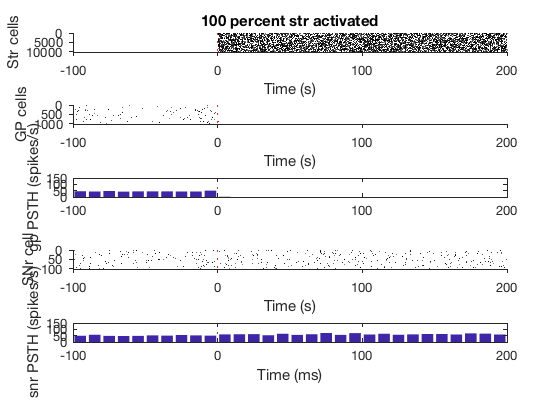

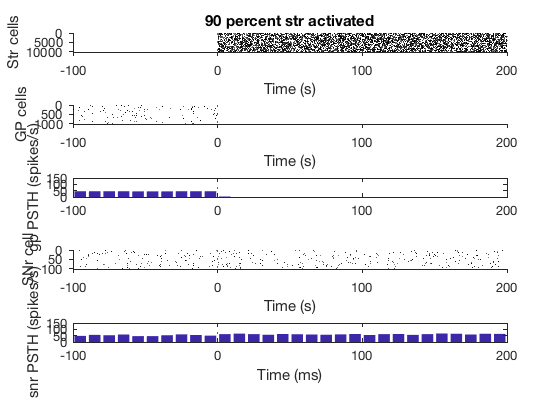

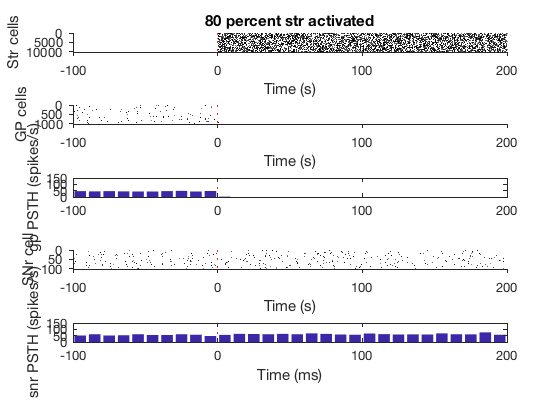

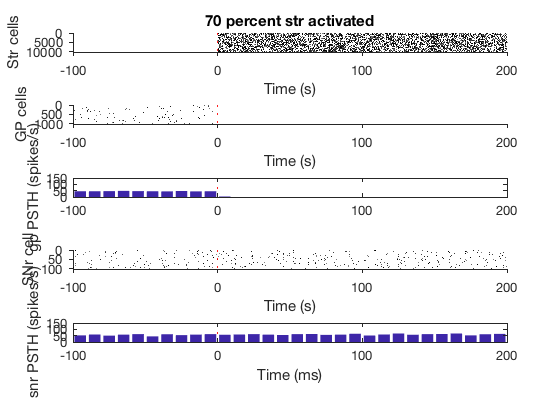

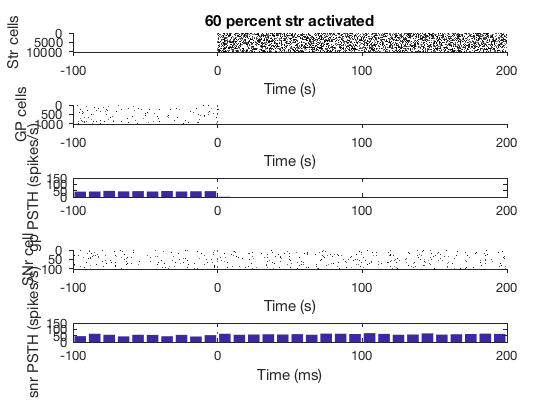

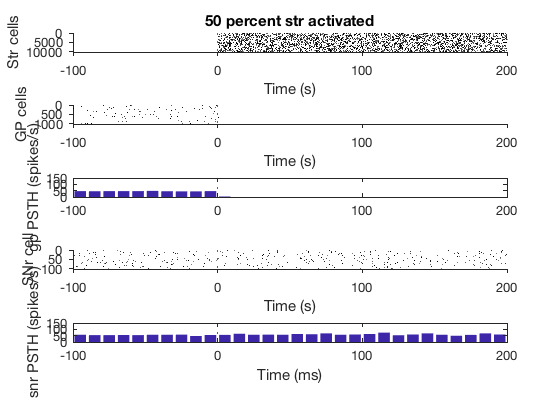

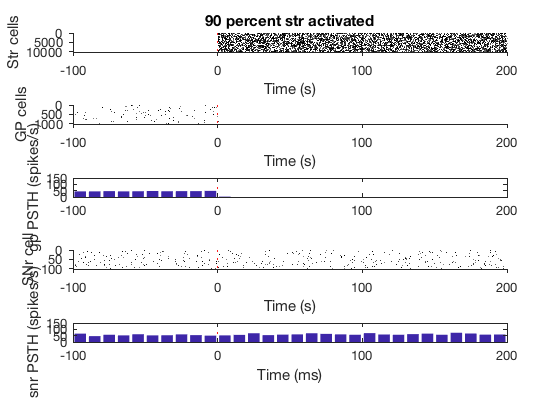

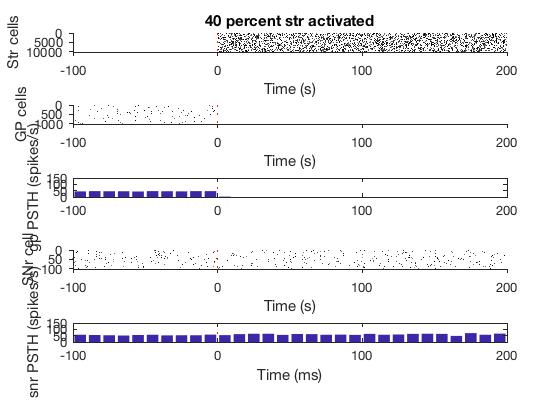

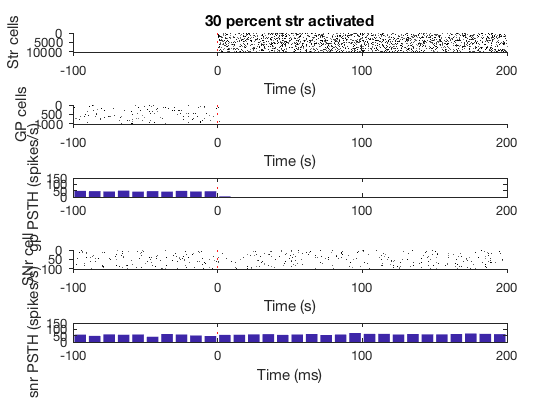

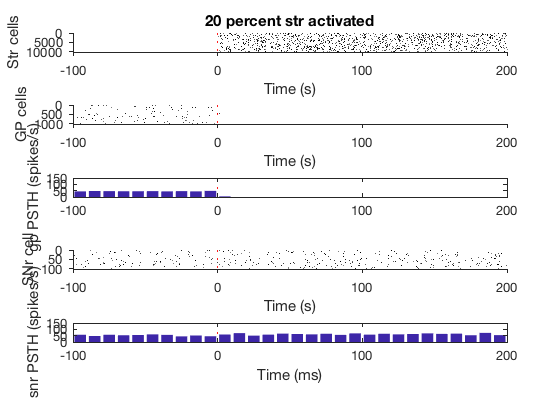

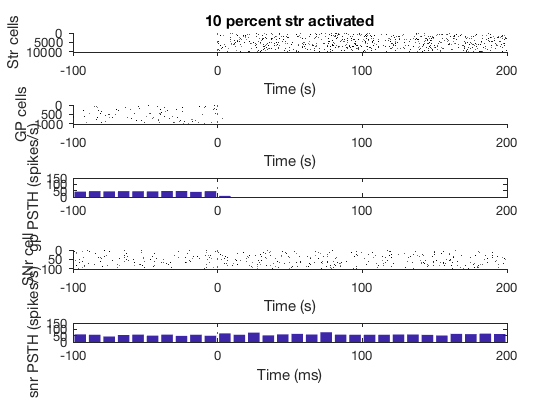

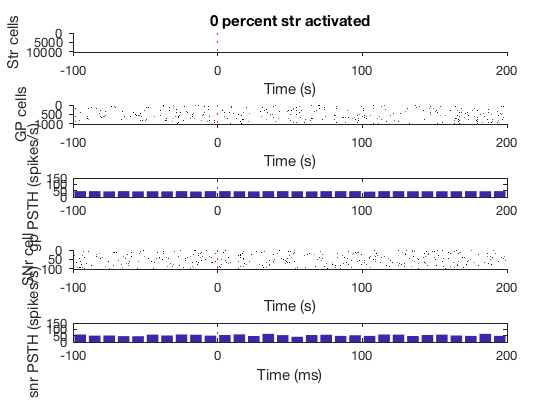

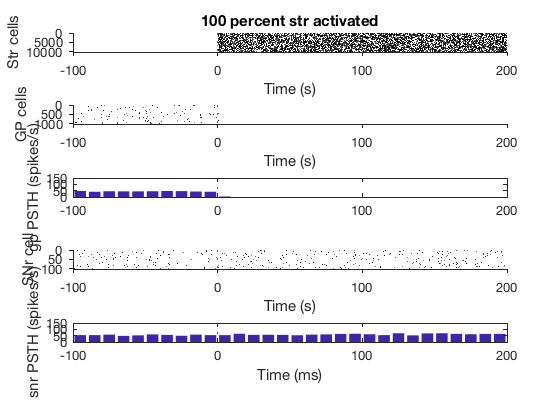

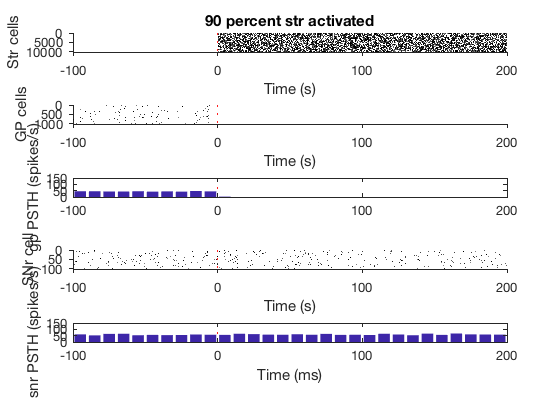

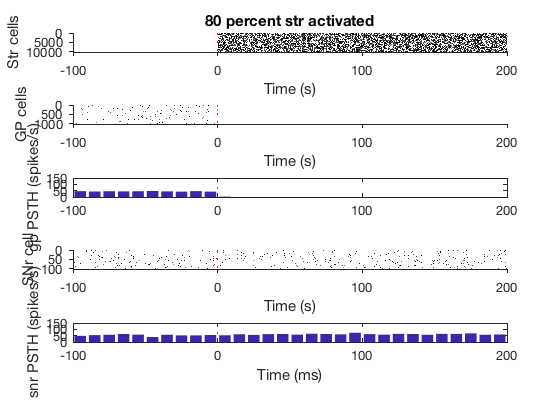

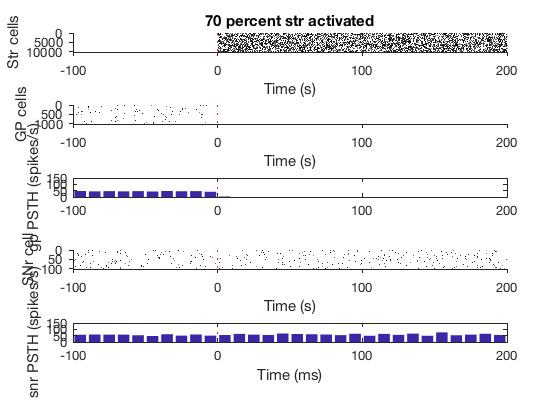

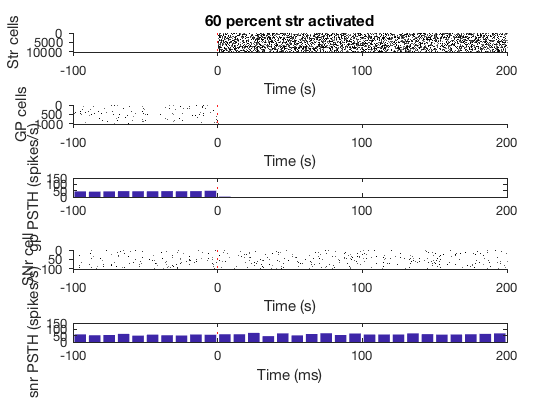

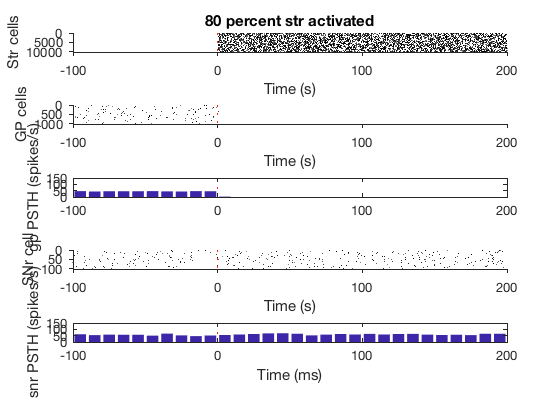

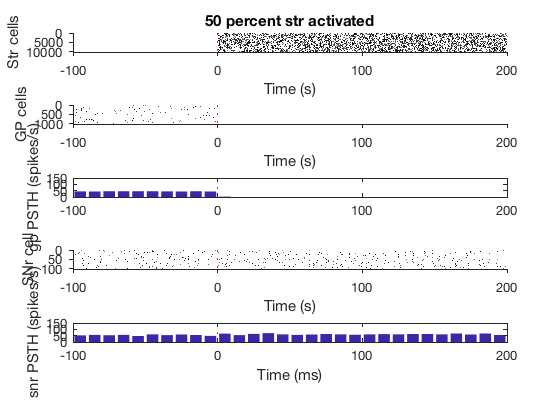

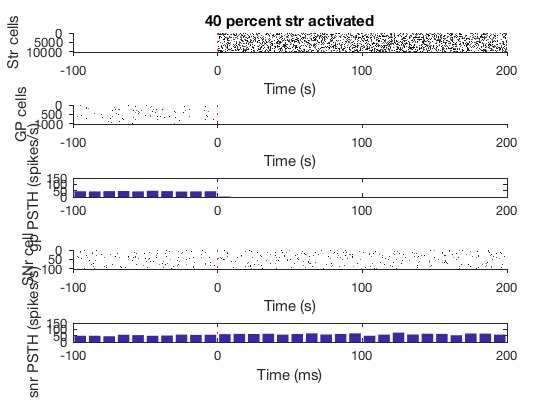

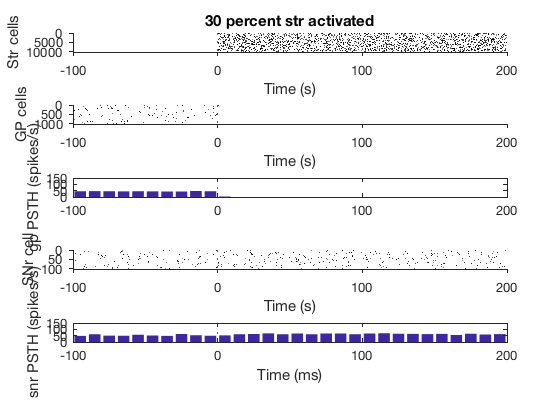

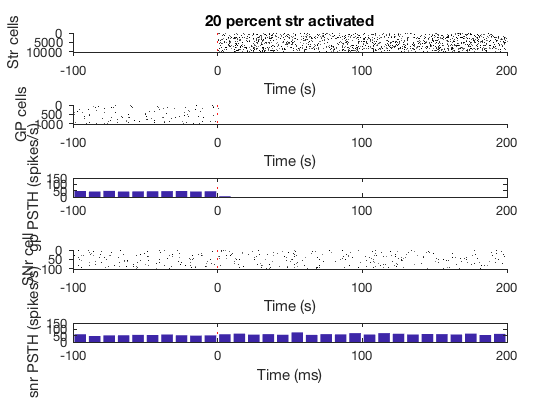

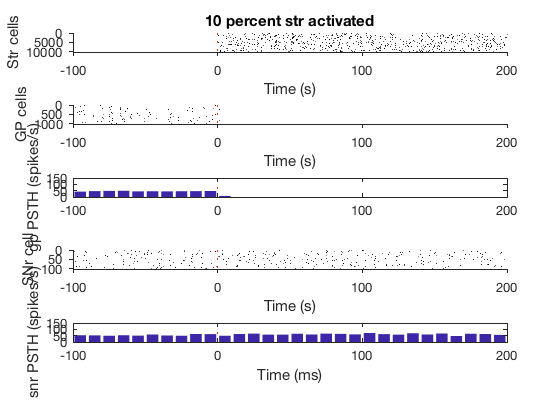

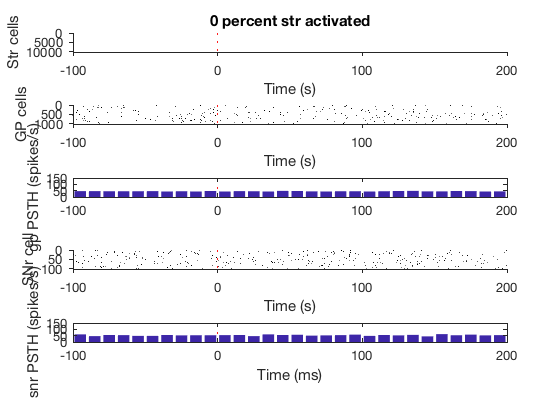

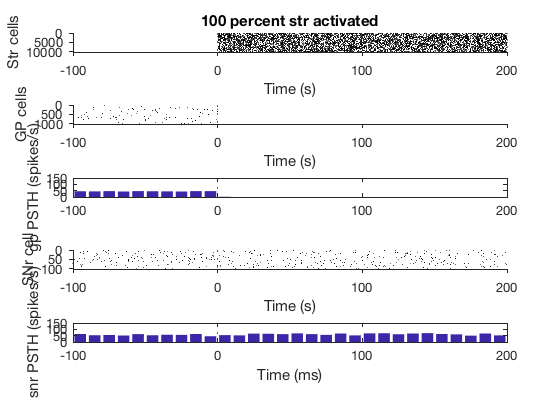

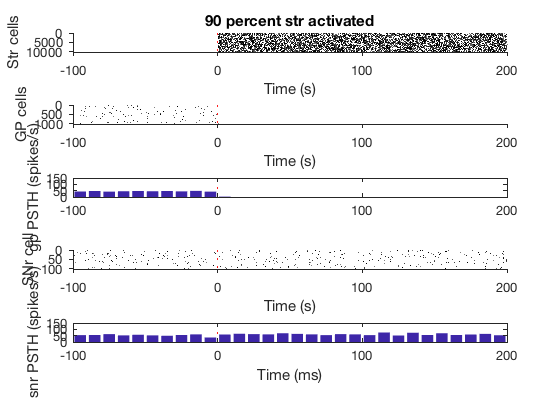

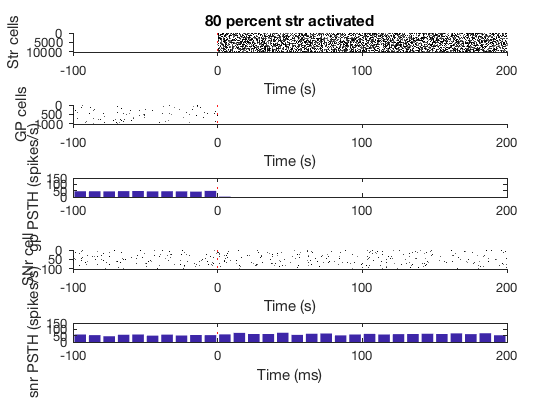

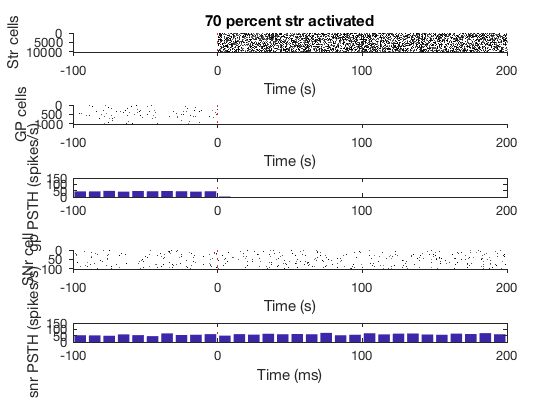

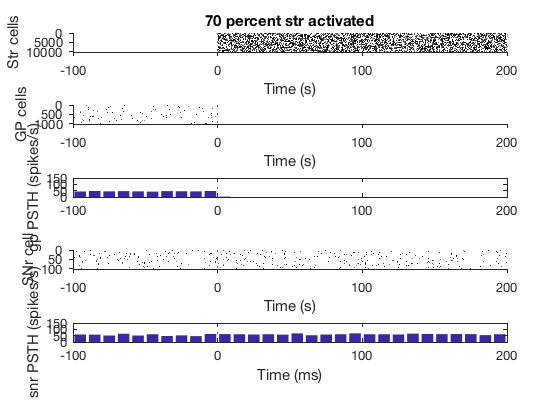

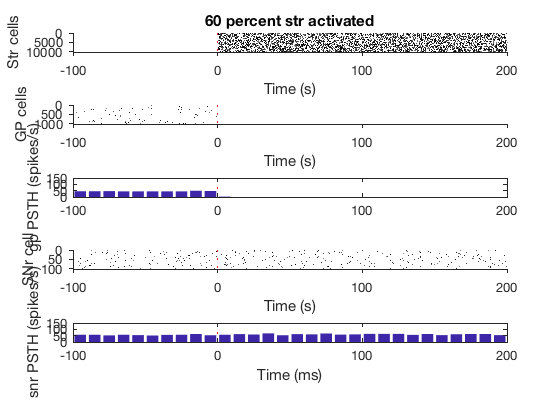

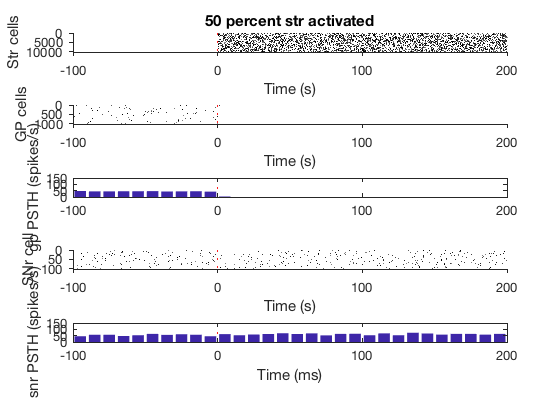

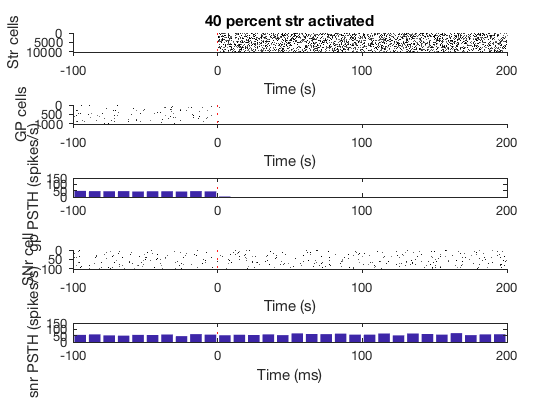

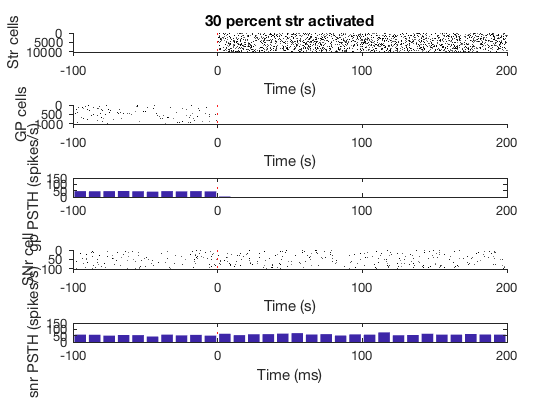

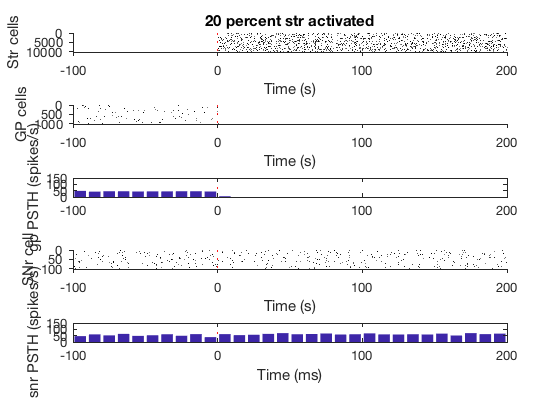

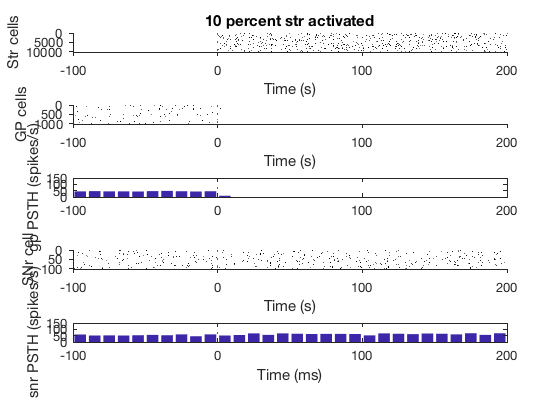

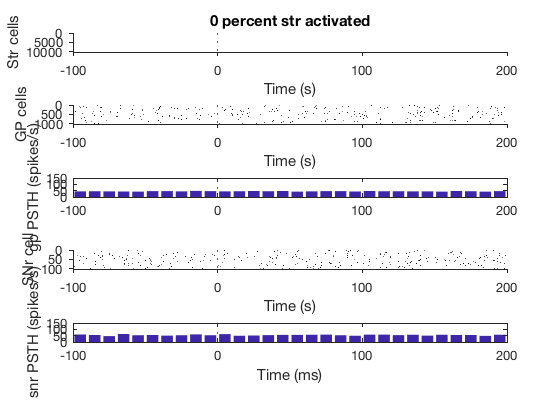

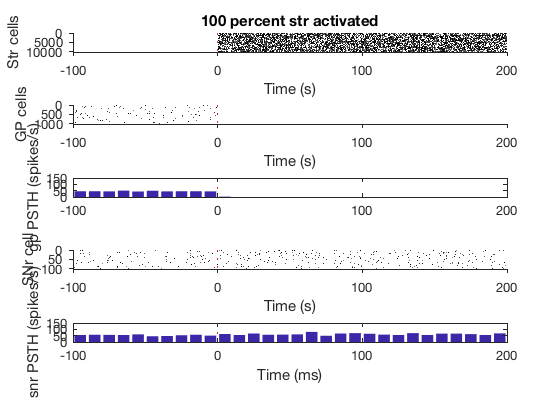

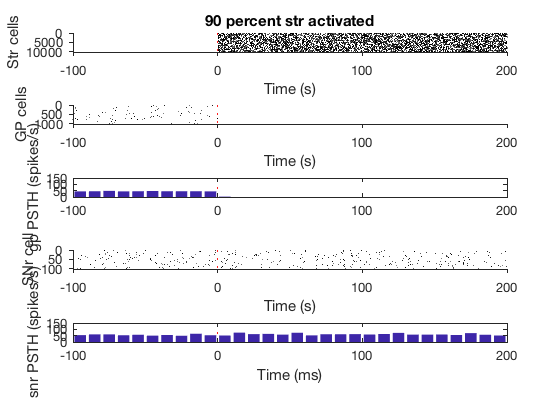

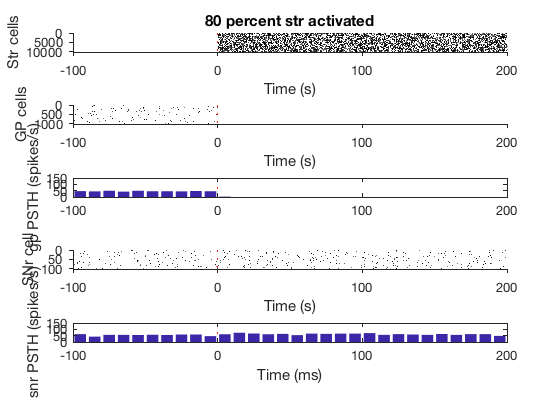

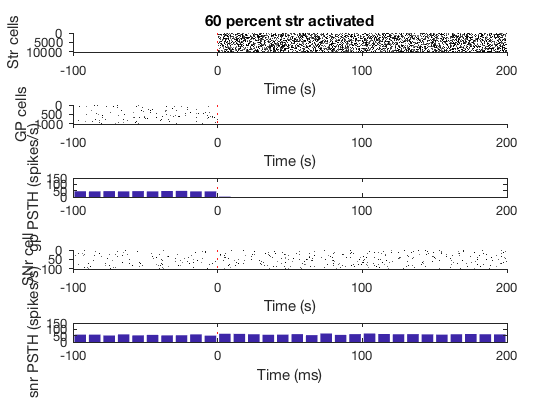

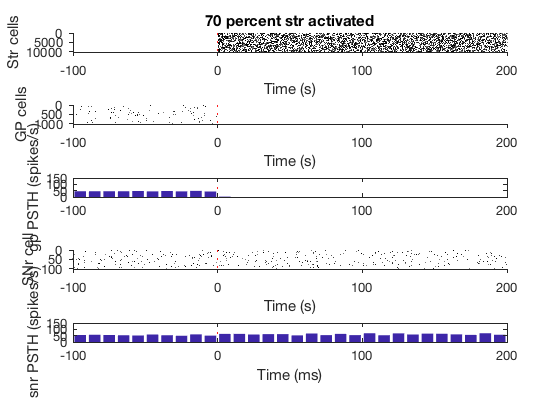

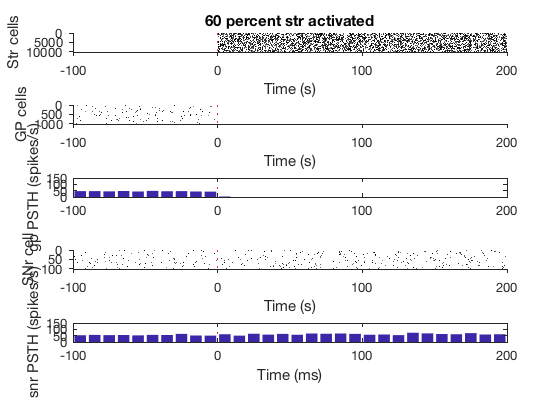

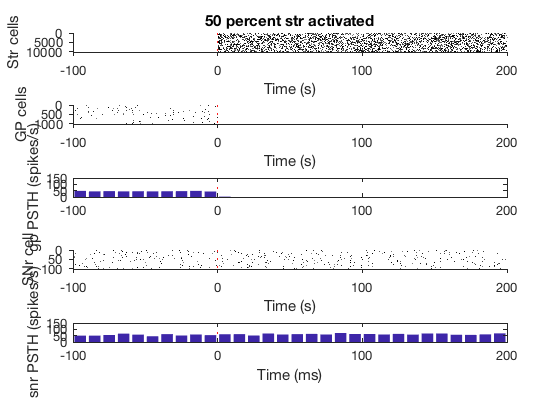

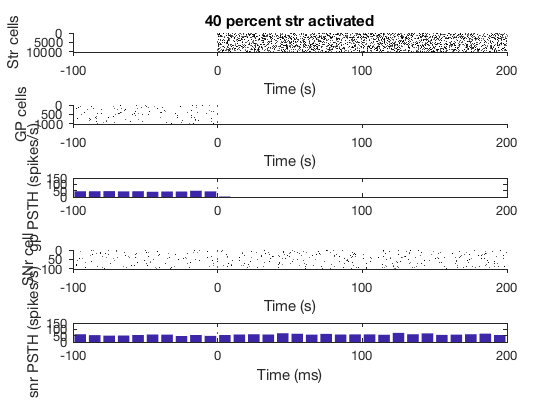

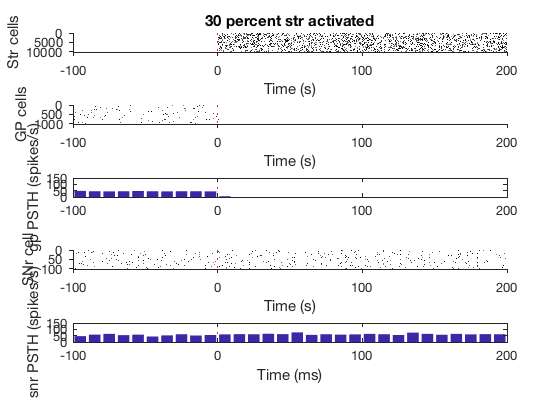

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [16]:
clear all
testRange = 0:10:100;
tdelay = zeros(10,length(testRange));

for sim_i = 1:10 % number of simulations
    for i = 1:length(testRange)
        clear spk_gp spk_snr spk_str
        
        dt = 0.0001;

        %Runs 20s simulation without any stimulus to measure steady-state values. 
        [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60); % initial conductance of gp to snr synapses 
        
        parfor l = 1:100
            %%Simulation
            [Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('n',100,'stimCellsPer',testRange(i),...
            'I_exc_gp',60,'g_gp2snr_i',g_gp2snr,'connectivity','all');

            spk_gp{l,1} = Vm_gp==15;
            spk_snr{l,1} = Vm_snr==15;
            spk_str{l,1} = Vm_str==15;
        end

        spk_str = double(cell2mat(spk_str)); % wrong conversion
        spk_snr = double(cell2mat(spk_snr));
        spk_gp = double(cell2mat(spk_gp));

        %%Plot
        figure
        subplot(5,1,1)
        plotRaster(spk_str);
        title(sprintf('%d percent str activated',testRange(i)))
        ylabel('Str cells')
        xlim([0.9 1.2])
        xticks([0.9 1 1.1 1.2])
        xticklabels({'-100','0','100','200'})
        vline(1)

        subplot(5,1,2)
        plotRaster(spk_gp);
        ylabel('GP cells')
        xlim([0.9 1.2])
        xticks([0.9 1 1.1 1.2])
        xticklabels({'-100','0','100','200'})
        vline(1)

        subplot(5,1,4)
        plotRaster(spk_snr);
        ylabel('SNr cell')
        xlim([0.9 1.2])
        xticks([0.9 1 1.1 1.2])
        xticklabels({'-100','0','100','200'})
        vline(1)

        binWidth = 100; %0.1 ms

        t_bar = 1:binWidth:length(spk_snr);
        psth_gp = zeros(1,length(t_bar));
        psth_snr = zeros(1,length(t_bar));

        for psth_i = 1:length(t_bar)-1

            psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
            psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
        end

        binloc = (binWidth/2+t_bar-1)*0.0001;

        [M,I]=max(psth_snr);

        if binloc(I)>1 & binloc(I)<1.2
            tdelay(sim_i,i) = binloc(I);
        else
            tdelay(sim_i,i) = NaN;
        end

        subplot(5,1,3)
        bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))
        xlim([0.9 1.2])
        ylabel('gp PSTH (spikes/s)')
        xlim([0.9 1.2])
        xticks([0.9 1 1.1 1.2])
        xticklabels({'-100','0','100','200'})
        ylim([0 150])
        vline(1)

        subplot(5,1,5)
        bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
        xlim([0.9 1.2])
        ylabel('snr PSTH (spikes/s)')
        xlim([0.9 1.2])
        xticks([0.9 1 1.1 1.2])
        xticklabels({'-100','0','100','200'})
        ylim([0 150])
        vline(1)
        xlabel('Time (ms)')
        
    end
end


    tdelay
    figure
    subplot(2,1,1)
    e=errorbar(testRange,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('Striatum activation (%)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([0 100])
    ylim([1 1.1])
    yticks(linspace(1,1.1,10))
    yticklabels({'0','10','20','30','40','50','60','80','90','100'})
    title(sprintf('response time when SNr excitation = %d pA, Gpe excitation = %d pA, p=0.35, %d ms bin',70,60,10))


tdelay =

  Columns 1 through 7

       NaN       NaN       NaN       NaN    1.1250    1.0650    1.1450
       NaN       NaN    1.0550    1.1450       NaN       NaN    1.1450
       NaN       NaN       NaN    1.1650       NaN       NaN       NaN
       NaN    1.0250       NaN    1.1550       NaN    1.1450    1.0750
       NaN       NaN       NaN    1.0550       NaN    1.0850    1.1350
       NaN    1.1750    1.0450       NaN       NaN       NaN       NaN
       NaN    1.1050    1.0550       NaN    1.1250       NaN    1.0250
       NaN    1.0750    1.1850       NaN       NaN    1.1150    1.1050
    1.0150    1.0550       NaN       NaN    1.0250    1.0550       NaN
       NaN       NaN    1.0850       NaN       NaN    1.0450       NaN

  Columns 8 through 11

    1.0850    1.1950    1.0750       NaN
    1.1150       NaN       NaN       NaN
       NaN       NaN       NaN       NaN
    1.1450       NaN       NaN    1.1350
       NaN    1.0150    1.0150    1.0650
    1.0750    1.0450    1.

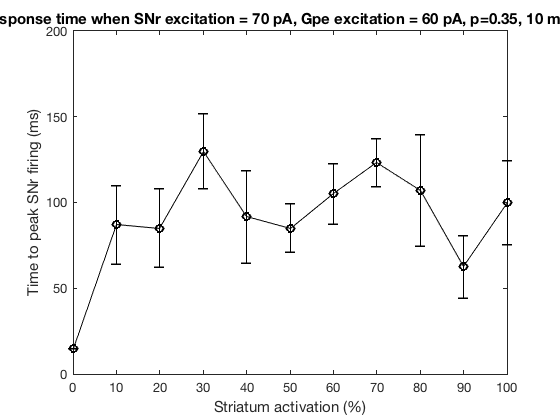

In [19]:
tdelay
    figure
    
    e=errorbar(testRange,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('Striatum activation (%)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([0 100])
    ylim([1 1.2])
    yticks(linspace(1,1.2,5))
    yticklabels({'0','50','100','150','200'})
    title(sprintf('response time when SNr excitation = %d pA, Gpe excitation = %d pA, p=0.35, %d ms bin',70,60,10))

In [12]:
psth_snr(100:120)/(size(spk_snr,1)*(binWidth_snr*0.0001))



ans =

  Columns 1 through 13

     0     0     0   200     0   200   200     0   200     0     0     0     0

  Columns 14 through 21

     0     0     0   200     0     0   200     0



The latency for all conditions is <100ms 